In [1]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("../../imports/imports.ipynb")

Populating the interactive namespace from numpy and matplotlib


/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)


## Panel H <br>
Data requirements: Patient HLA mutation status, MAF file

In [2]:
hla_df = pd.read_csv('../../data/clinical/mutated_hla.csv', index_col=0)
hla_df.index = hla_df['Sample']

In [3]:
mutations_df = pd.read_csv('../../data/tcga_mutation_file.csv', index_col=0)
mutations_df = mutations_df.drop_duplicates(['Barcode', 'Hugo_Symbol', 'Protein_position'])
mutations_df = mutations_df[mutations_df.Barcode.isin(hla_df['Sample'])]

In [4]:
tissues_df = pd.read_csv('../../data/patient_tissues.csv', index_col=0)

In [6]:
df = pd.merge(tissues_df, pd.merge(pd.DataFrame(mutations_df.Barcode.value_counts()), hla_df, left_index=True, right_index=True),
                          left_index=True, right_index=True)
df.columns = ['Tissue', 'number_of_mutations', 'Sample', 'mutated_hla']

In [8]:
tissues = list(df[df.mutated_hla == 1].Tissue.value_counts().index)[:10]

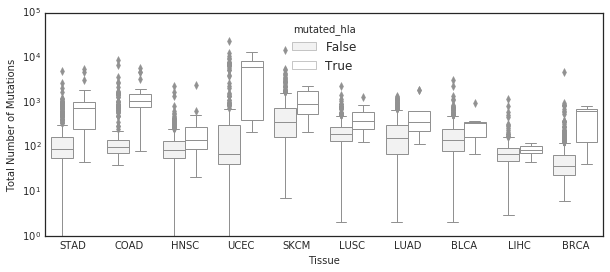

In [9]:
plt.rcParams['figure.figsize']=(10,4)
ax = sns.boxplot(x='Tissue', y='number_of_mutations', hue='mutated_hla', order=tissues, data=df, 
                 color='white')
ax.set_yscale("log")
plt.ylabel('Total Number of Mutations')